Epoch 1/5
  25/1875 [..............................] - ETA: 8s - loss: 1.8993 - accuracy: 0.5750

2023-05-29 15:29:42.074360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.3499 - accuracy: 0.9147

2023-05-29 15:29:49.748427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.3495 - accuracy: 0.9148 - val_loss: 0.1847 - val_accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1656 - accuracy: 0.9559 - val_loss: 0.1383 - val_accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1251 - accuracy: 0.9672 - val_loss: 0.1141 - val_accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1008 - accuracy: 0.9739 - val_loss: 0.0998 - val_accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0854 - accuracy: 0.9784 - val_loss: 0.0904 - val_accuracy: 0.9759
Time taken: 42.44595909118652 seconds


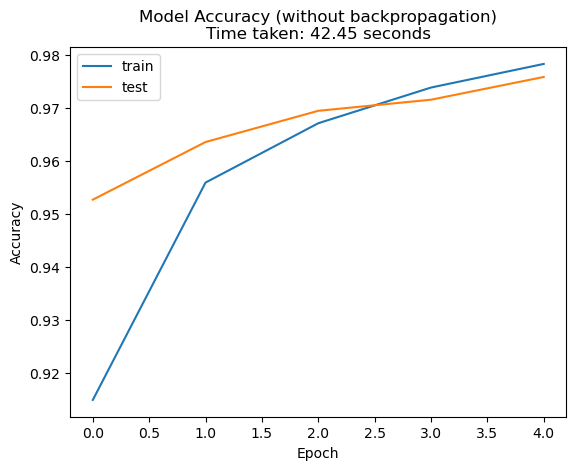

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data for use in a convolutional neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the model
model = tf.keras.models.Sequential([
    # First network: 3 convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', trainable=False),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', trainable=False),
    tf.keras.layers.Flatten(),
    # Second network: 1 dense layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the time taken
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)
end_time = time.time()
print("Time taken:", end_time - start_time, "seconds")

# Plot the accuracy graph with time taken
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (without backpropagation)\nTime taken: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
